In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Números aleatorios

In [19]:
np.random.random() #distribución uniforme

0.2725926052826416

In [20]:
## semilla, seed
np.random.seed(1234)
np.random.random()

0.1915194503788923

In [29]:
np.random.seed(1234)
aleatorios = np.random.random(1000000)

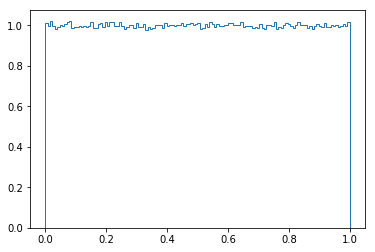

In [31]:
plt.hist(aleatorios, bins = 128, histtype = "step", 
        density = True)
plt.show()

In [34]:
np.random.seed(1234)
aleatorios = np.random.randn(1000000)

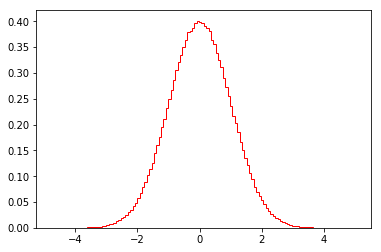

In [36]:
plt.hist(aleatorios, bins = 128, histtype = "step", 
        density = True, color = "red")
plt.show()

### Caisno

Dados...

In [38]:
def rollDice():
    return np.random.randint(1,7)

In [44]:
[rollDice() for i in range(10)]

[4, 6, 5, 2, 5, 5, 2, 5, 5, 1]

In [93]:
def rollGame():
    roll = np.random.randint(1,7)
    if roll  >= 4:
        return False
    else: 
        return True
    

In [94]:
def apostador_simple(fondos, ini_apuesta, n_apuestas):
    valor = fondos
    apuesta = ini_apuesta
    apuestaActual = 0
    while apuestaActual < n_apuestas:
        if rollGame():
            valor += apuesta
        else: 
            valor -= apuesta
        apuestaActual += 1
        print("Fondos: ", valor)
        

In [95]:
apostador_simple(1000, 100, 5)

Fondos:  900
Fondos:  1000
Fondos:  1100
Fondos:  1000
Fondos:  900


In [96]:
def apostador_simple(fondos, ini_apuesta, n_apuestas):
    valor = fondos
    apuesta = ini_apuesta
    apuestaActual = 0
    wX, wY = [], []
    while apuestaActual < n_apuestas:
        if rollGame():
            valor += apuesta
            wX.append(apuestaActual)
            wY.append(valor)
        else: 
            valor -= apuesta
            wX.append(apuestaActual)
            wY.append(valor)
        apuestaActual += 1
    plt.plot(wX, wY, lw = 1.5)

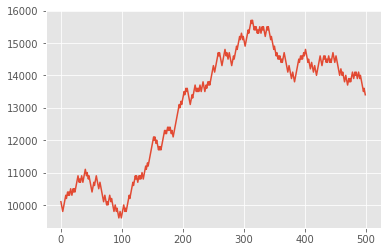

In [97]:
apostador_simple(10000, 100, 500)

In [98]:
plt.style.use("ggplot")

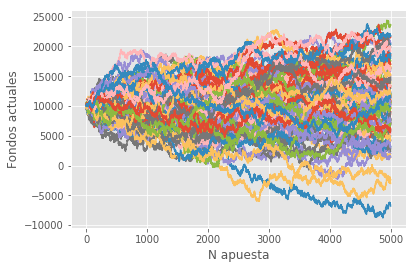

In [105]:
x = 0
while x < 100:
    apostador_simple(10000, 100, 5000)
    x += 1
    plt.grid(True)
    plt.ylabel("Fondos actuales")
    plt.xlabel("N apuesta")
plt.show()

## Caminata aleatoria

In [106]:
np.cumsum

<function numpy.core.fromnumeric.cumsum(a, axis=None, dtype=None, out=None)>

In [107]:
numeros = np.array([1, 2, 3, 4, 5, 6])

In [108]:
np.cumsum(numeros)

array([ 1,  3,  6, 10, 15, 21], dtype=int32)

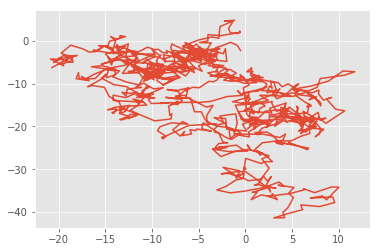

In [111]:
n_pasos = 1000
x = np.cumsum(np.random.randn(n_pasos))
y = np.cumsum(np.random.randn(n_pasos))
plt.plot(x,y)
plt.show()

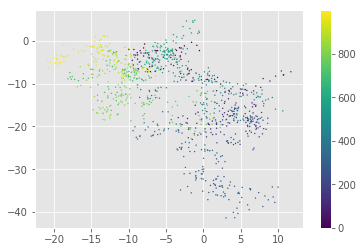

In [113]:
plt.scatter(x, y, c = range(n_pasos), lw = 0,
            marker = "o", s = 2, cmap = "viridis")
plt. colorbar()
plt.show()

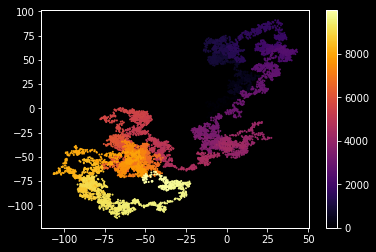

In [119]:
n_pasos = 10000
plt.style.use("dark_background")
x = np.cumsum(np.random.randn(n_pasos))
y = np.cumsum(np.random.randn(n_pasos))
plt.scatter(x,y,c = range(n_pasos), lw = 0, marker = "o", s = 4, cmap= "inferno")
plt.grid(False)
plt.colorbar()
plt.show()

## cadenas de Markov

In [116]:
n = 100
a = .5/n
b = .5/n
npasos = 1000
x = np.zeros(npasos)
x[0] = 25
for t in range(npasos -1):
    if 0 < x[t] < n - 1:
        nacimiento = np.random.rand() <= a*x[t]
        muerte = np.random.rand() <= b*x[t]
        x[t+1] = x[t] + nacimiento*1 - muerte*1
    else:
        x[t +1] = x[t]

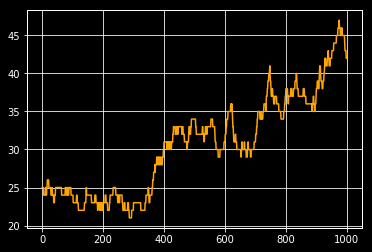

In [117]:
plt.plot(x, c = "orange")
